<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise_8_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Dataset with brain atlas A**: use the Oasis dataset for classification of male and female individuals based on brain scans.

``Task 3:`` Building on task 1+2, plot other performance metrics instead of classification accuracy. Using the same train/test set as Q1/2 with 100 ROIs (``nrois=100``), plot the following test performance metrics: a) **precision**, b) **recall**, c) **f1 score**, d) **sensitivity/recall**, and e) **specificity** (5 lines with 5 colors, same axes as Q1/2).

In [ ]:
%%capture
!pip install nilearn

In [ ]:
%%capture
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [ ]:
%%capture
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
%%capture
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# We prepare the variable where we will store the model fits

ridge_test_precision = []
ridge_test_recall = []
ridge_test_f1 = []
ridge_test_specificity = []


In [ ]:
# We import the data first in order to select the last 10 subjects
%%capture
brain_data = datasets.fetch_oasis_vbm(n_subjects=(100))
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=(100)) # We fix this at 100
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

In [ ]:
# We prepare the models with the required parameters
logreg = LogisticRegression(max_iter=1e4, penalty = 'l2', C = 1, solver = 'saga')

In [ ]:
X, y = input_variables, output_variable
X_scaled = scaler.fit_transform(X)
X_test = X_scaled[90:100]
y_true = y[90:100]
X_train = X_scaled[0:90]
y_train = y[0:90]

In [ ]:
number = list(range(0,9))
sample = [10, 20, 30, 40, 50, 60, 70, 80, 90]

In [ ]:
%%capture
for i in number:
    RidgeReg = logreg.fit(X_train[0:sample[i]],y_train[0:sample[i]]) # We fit the ridge training model
    y_pred = RidgeReg.predict(X_test) # We predict X_test based on RidgeReg
    
    score_1 = precision_score(y_true,y_pred)
    score_2 = recall_score(y_true,y_pred)
    score_3 = f1_score(y_true,y_pred)        
    score_4 = recall_score(y_true,y_pred, pos_label=0)
    ridge_test_precision.append(score_1) # We store the scores
    ridge_test_recall.append(score_2) 
    ridge_test_f1.append(score_3) 
    ridge_test_specificity.append(score_4) 

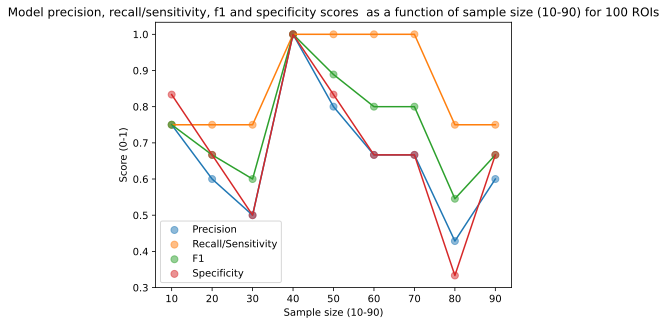

In [ ]:
# We're ready to plot
lab = ['Precision', 'Recall/Sensitivity', 'F1', 'Specificity']
plt.style.use("default")
plt.scatter(sample,ridge_test_precision, s=50, alpha = 0.5, marker = 'o')
plt.scatter(sample,ridge_test_recall, s=50, alpha = 0.5, marker = 'o')
plt.scatter(sample,ridge_test_f1, s=50, alpha = 0.5, marker = 'o')
plt.scatter(sample,ridge_test_specificity, s=50, alpha = 0.5, marker = 'o')
plt.legend(labels=(lab))
plt.gca().set(
    title="Model precision, recall/sensitivity, f1 and specificity scores  as a function of sample size (10-90) for 100 ROIs",
    xlabel="Sample size (10-90)",
    ylabel="Score (0-1)",
    xticks = (sample)
)
plt.plot(sample,ridge_test_precision)
plt.plot(sample,ridge_test_recall)
plt.plot(sample,ridge_test_f1)
plt.plot(sample,ridge_test_specificity)
plt.show()